# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


# **Students** (First Name and Last Name)

1. Marc Gonzalez Vidal
2. Oriol Miró López-Feliu

---

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology
from skimage.color import rgb2gray

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Oriol
base_path = '/content/drive/MyDrive/MAI_CV_LAB/labs_2_3/images/'

In [ ]:
# Marc
base_path = '/content/drive/MyDrive/images/'

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


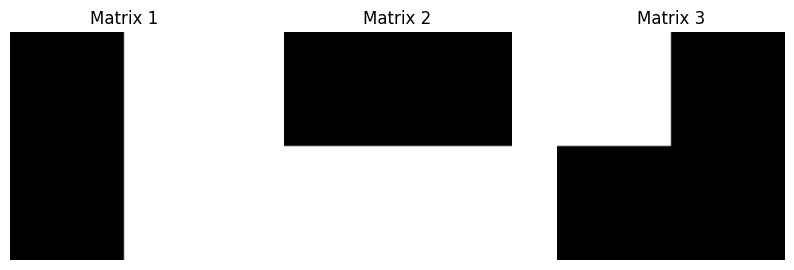

In [17]:
# solution

# ------- matrix definition -------

base_matrix = np.zeros((100, 100))

matrix1 = base_matrix.copy()
matrix1[:, 50:] = 255

matrix2 = base_matrix.copy()
matrix2[50:, :] = 255

matrix3 = base_matrix.copy()
matrix3[:50, :50] = 255


# ------- plotting -------

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(matrix1, cmap='gray')
axs[0].set_title('Matrix 1')
axs[0].axis('off')  # Hide axis

axs[1].imshow(matrix2, cmap='gray')
axs[1].set_title('Matrix 2')
axs[1].axis('off')

axs[2].imshow(matrix3, cmap='gray')
axs[2].set_title('Matrix 3')
axs[2].axis('off')

plt.show()

*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

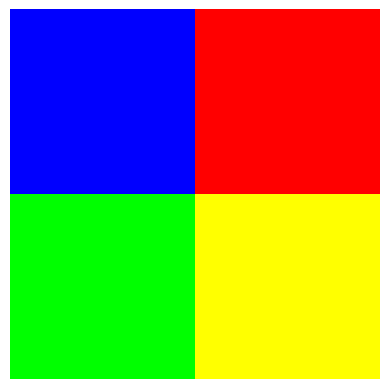

In [ ]:
# solution
color_image = np.zeros((100, 100, 3), dtype=np.uint8)

color_image[:, :, 0] = matrix1  # r
color_image[:, :, 1] = matrix2  # g
color_image[:, :, 2] = matrix3  # b


# ------- plotting -------

plt.imshow(color_image)
plt.axis('off')
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using matplotlib subplot.



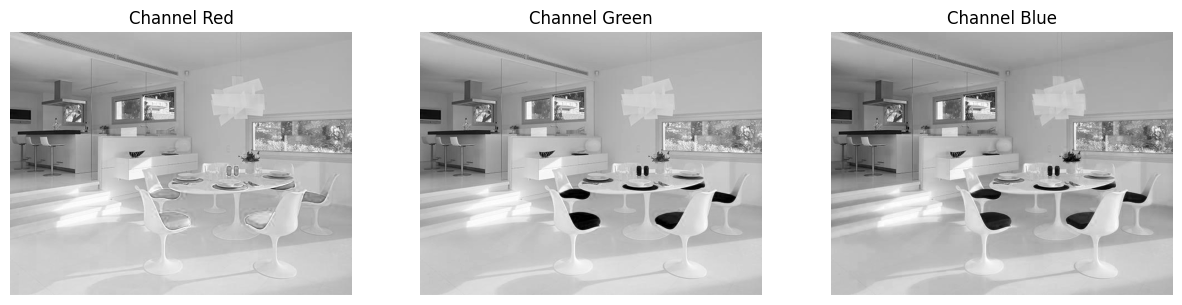

In [18]:
image_chairs  = io.imread(base_path + "sillas.jpg")

channel_r = image_chairs[:, :, 0]  # r
channel_g = image_chairs[:, :, 1]  # g
channel_b = image_chairs[:, :, 2]  # b


# ------- plotting -------

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(channel_r, cmap='gray')
axs[0].set_title('Channel Red')
axs[0].axis('off')

axs[1].imshow(channel_g, cmap='gray')
axs[1].set_title('Channel Green')
axs[1].axis('off')

axs[2].imshow(channel_b, cmap='gray')
axs[2].set_title('Channel Blue')
axs[2].axis('off')

plt.show()

* Create a new image and **swap the 'red' and 'blue' channels**
* Visualize the original image and the created image using matplotlib subplot.



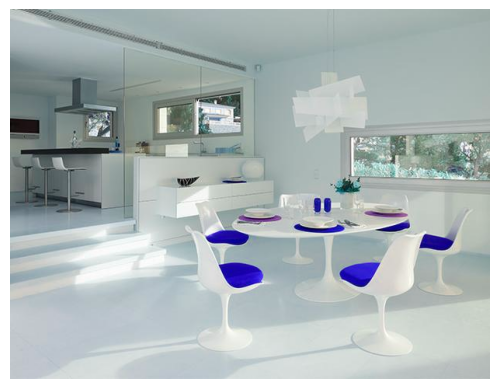

In [ ]:
# solution
image_chairs_inverted = image_chairs.copy()

image_chairs_inverted[:, :, 2] = image_chairs[:, :, 0]
image_chairs_inverted[:, :, 1] = image_chairs[:, :, 1]
image_chairs_inverted[:, :, 0] = image_chairs[:, :, 2]


# ------- plotting -------

plt.imshow(image_chairs_inverted)
plt.axis('off')
plt.show()

*   Now lets change specific areas of the picture.
*   The color **red** of the chair and the table looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**. *Hint: Play with the matrices here, Think masks!!!*
*   Visualize the original image and the created image using matplotlib subplot.

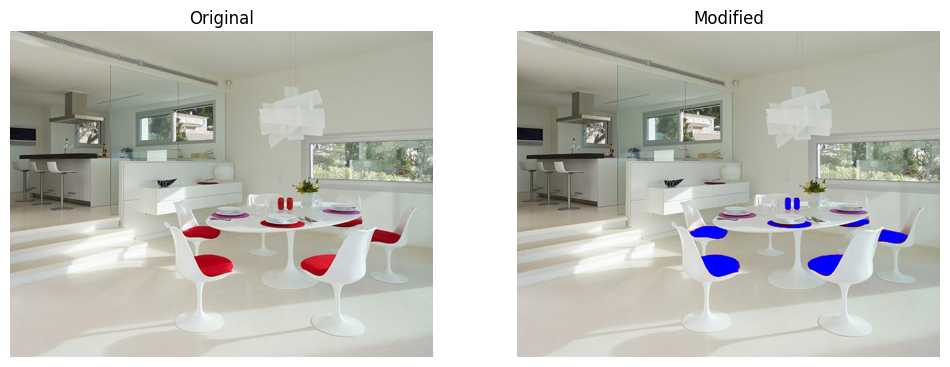

In [ ]:
# solution
red_threshold   = 100
green_threshold = 80
blue_threshold  = 80

# we want when red is dominant over other colors
red_mask = (image_chairs[:, :, 0] > red_threshold) & (image_chairs[:, :, 1] < green_threshold) & (image_chairs[:, :, 2] < blue_threshold)

red_reduced_chairs = image_chairs.copy()
red_reduced_chairs[red_mask] = [0, 0, 255]


# ------- plotting -------

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# og image
ax[0].imshow(image_chairs)
ax[0].set_title("Original")
ax[0].axis('off')

# new image
ax[1].imshow(red_reduced_chairs)
ax[1].set_title("Modified")
ax[1].axis('off')

plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


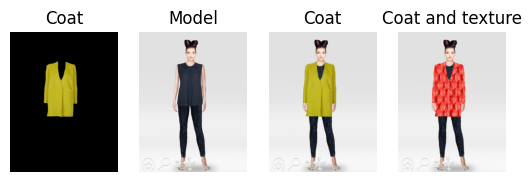

In [11]:
# solution

model_image   = io.imread(base_path + "model.png")[:, :, :3]
coat_image    = io.imread(base_path + "coat.png")[:, :, :3]
texture_image = io.imread(base_path + "texture2.png")

coat_mask = np.any(coat_image > 0, axis=-1)

model_with_coat             = model_image.copy()
model_with_coat[coat_mask]  = coat_image[coat_mask]


model_with_coat_texture             = model_with_coat.copy()
model_with_coat_texture[coat_mask]  = texture_image[coat_mask]


# ------- plotting -------

fig, axs = plt.subplots(1, 4)

axs[0].imshow(coat_image)
axs[0].set_title("Coat")
axs[0].axis("off")

axs[1].imshow(model_image)
axs[1].set_title("Model")
axs[1].axis("off")

axs[2].imshow(model_with_coat)
axs[2].set_title("Coat")
axs[2].axis("off")

axs[3].imshow(model_with_coat_texture)
axs[3].set_title("Coat and texture")
axs[3].axis("off")

plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib bar plot.




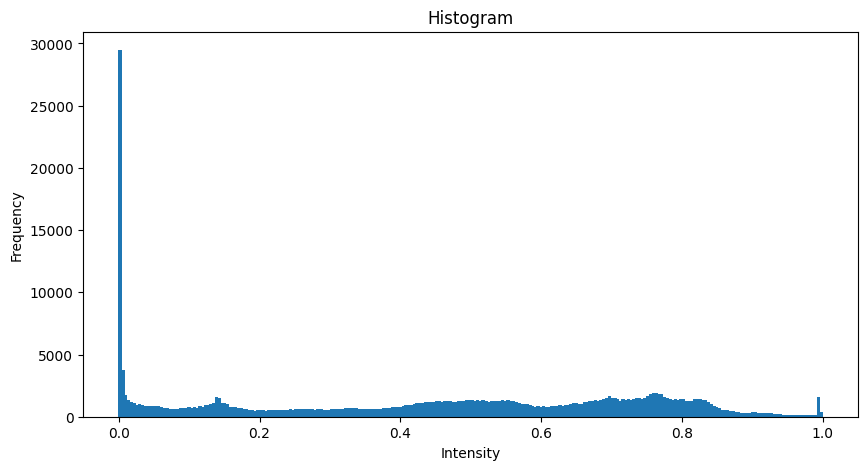

In [ ]:
# solution

astronaut_original  = data.astronaut()
astronaut_grayscale = rgb2gray(astronaut_original)
hist, bins = exposure.histogram(astronaut_grayscale)

# ------- plotting -------

plt.figure(figsize=(10, 5))
plt.bar(bins, hist, width=0.005) # WIDTH IS IMPORTANT!
plt.title('Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib bar plot.

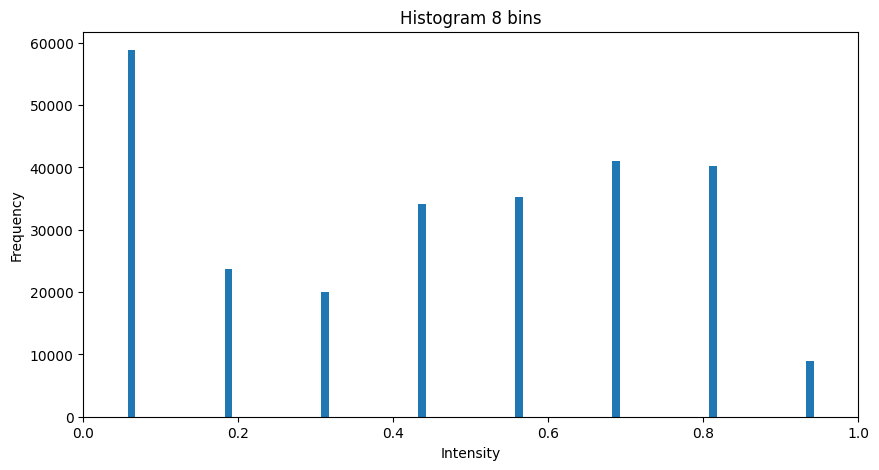

In [ ]:
hist_8b, bins_8b = exposure.histogram(astronaut_grayscale, nbins=8)


# ---------- plot histogram ----------

plt.figure(figsize=(10, 5))
plt.bar(bins_8b, hist_8b, width=0.01) # WIDTH IS IMPORTANT!
plt.title('Histogram 8 bins')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 1])
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

- **What happens when you change the bin count?:**
You alter the granularity of the intensity distribution representation. An increase of bin counts results in finer detail, while a decrease results in a coarser, more global and broad representation of the image.

- **Does your inference change based on the bin count?:**
Yes. A higher bin count might reveal more subtle variations, while a lower bin count might reveal more high level patterns. With the former, our interpretation could lack consideration for the bigger picture (as the surface is too smooth), and with the latter we might loose too much detail. For us, a lower bin count was more representative of the image, as the original histogram seemed to show a majority of black pixels. Moreover, as it is hard to distinguish between very close intensities (such as 100 and 101, in [0, 255]), a lower bin count makes the histogram more interpretable (up to an extent).

- **What happens when the bin count is very low and what happens when it is very high?**
  - **Very high:**  It results in many bins with few counts, making the histogram sparse. This makes discerning trends and interpretation difficult.
  - **Very low:** The histogram becomes too coarse, potentially masking important features. This could lead to misleading interpretations, with too many intensity values grouped together.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single stairs plot with differnt legends for each histogram).


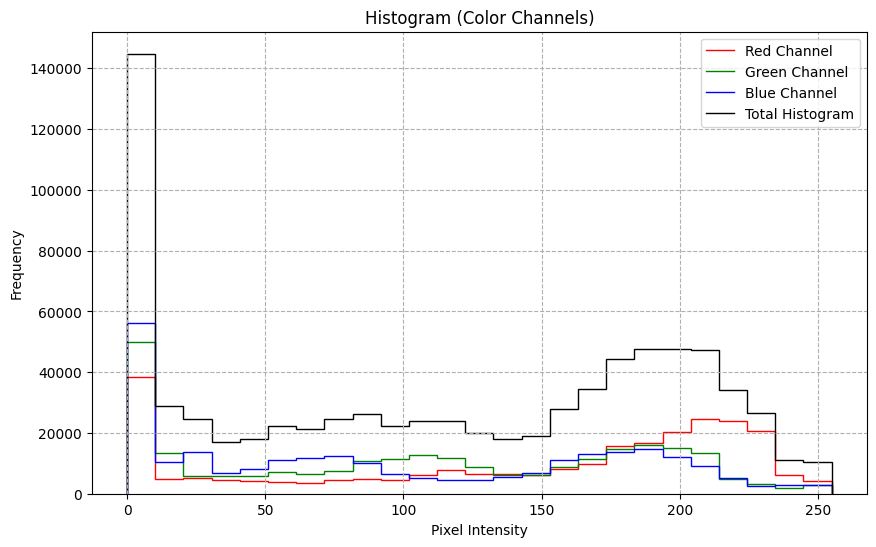

In [ ]:
#solution

# we use numpy to compute histograms as it produces the bin edges directly, needed for the stair plots
hist_r, bins_r  = np.histogram(astronaut_original[:, :, 0], bins=25)
hist_g, bins_g  = np.histogram(astronaut_original[:, :, 1], bins=25)
hist_b, bins_b  = np.histogram(astronaut_original[:, :, 2], bins=25)
hist_t, bins_t  = np.histogram(astronaut_original, bins=25)


# ---------- plot histogram ----------

plt.figure(figsize=(10, 6))
plt.stairs(hist_r, bins_r, color='red',  label='Red Channel')
plt.stairs(hist_g, bins_g, color='green',label='Green Channel')
plt.stairs(hist_b, bins_b, color='blue', label='Blue Channel')
plt.stairs(hist_t, bins_t, color='black',label='Total Histogram')
plt.title('Histogram (Color Channels)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


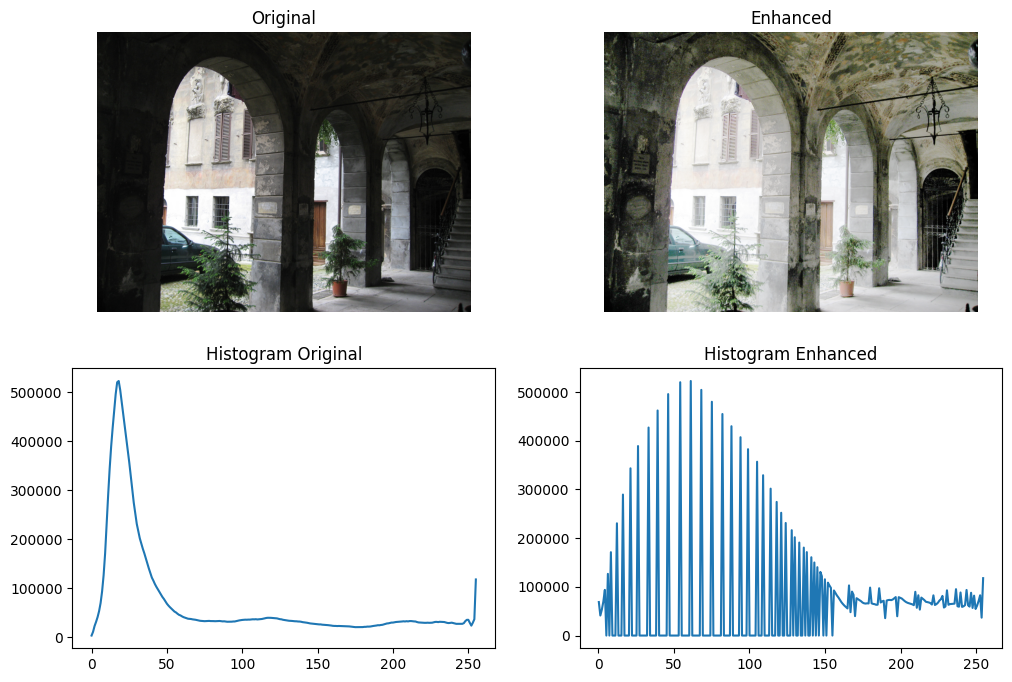

In [13]:
# solution
aquatermi     = io.imread(base_path + "aquatermi_lowcontrast.jpg")
aquatermi_eq  = exposure.equalize_hist(aquatermi)

hist_at, bins_at        = exposure.histogram(aquatermi)
hist_at_eq, bins_at_eq  = exposure.histogram(aquatermi_eq)


# ---------- plot histogram ----------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# og image
axes[0, 0].imshow(aquatermi)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# enhanced
axes[0, 1].imshow(aquatermi_eq)
axes[0, 1].set_title('Enhanced')
axes[0, 1].axis('off')

# hist og
axes[1, 0].plot(bins_at, hist_at)
axes[1, 0].set_title('Histogram Original')

# hist enhanced
axes[1, 1].plot(bins_at_eq*255, hist_at_eq) # *255 so same x axis, easier comparison
axes[1, 1].set_title('Histogram Enhanced')

plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

The above function stretches the image in a non-linear manner, taking into account image's histogram, while linear contrast simply scales pixels linearly, without adapting to the image's distribution.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function).
*   Provide grayscale image array and range of brightness values as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



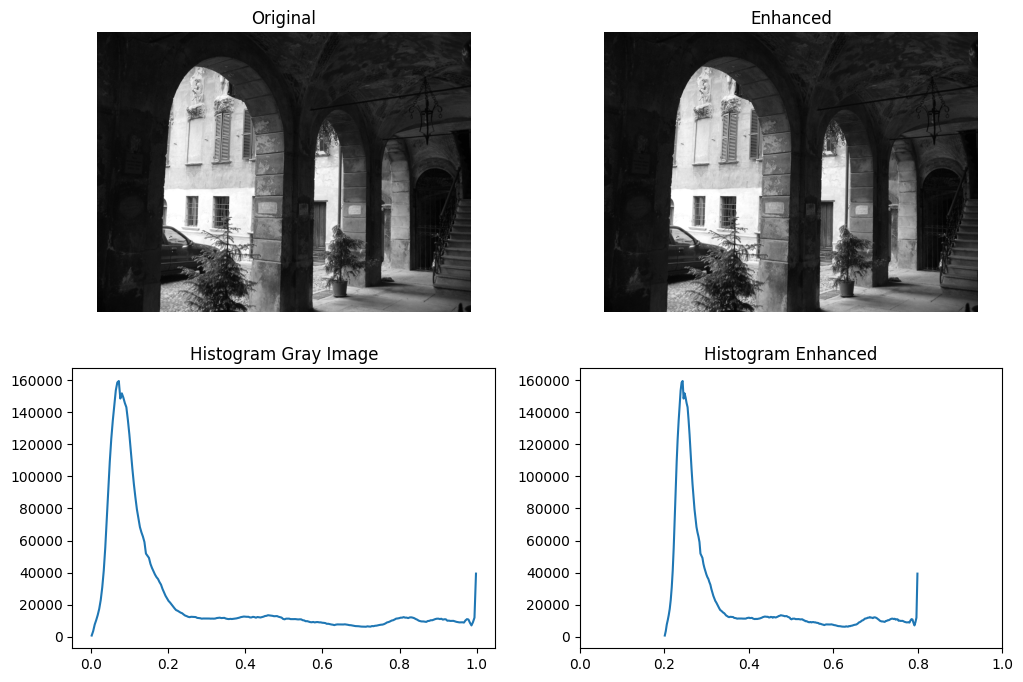

In [14]:
# solution

def LCS(image, b_min, b_max):
    i_min = np.min(image)
    i_max = np.max(image)

    new_image = np.zeros(image.shape)

    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        new_image[i][j] = ((image[i][j] - i_min) / (i_max - i_min)) * (b_max - b_min) + b_min

    return new_image

aquatermi_gray  = rgb2gray(aquatermi)
enchanced_image = LCS(aquatermi_gray, 0.2, 0.8)

hist_at, bins_at        = exposure.histogram(aquatermi_gray)
hist_at_eq, bins_at_eq  = exposure.histogram(enchanced_image)

#<------------- Plots ------------->
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# gray image
axes[0, 0].imshow(aquatermi_gray, cmap="gray")
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# enhanced
axes[0, 1].imshow(enchanced_image, cmap="gray")
axes[0, 1].set_title('Enhanced')
axes[0, 1].axis('off')

# hist og
axes[1, 0].plot(bins_at, hist_at)
axes[1, 0].set_title('Histogram Gray Image')

# hist enhanced
axes[1, 1].plot(bins_at_eq, hist_at_eq) # *255 so same x axis, easier comparison
axes[1, 1].set_title('Histogram Enhanced')
axes[1, 1].set_xlim([0, 1])

plt.show()

* How different is a linear **selective** contrast stretch?

**Solution**

It is quite different, since this technique, unlike the previous one, allows us to select different areas and apply the previous algorithm in specific sections of an image where it is needed, without uniformly affecting the entire image.

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem / footprint) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 (radius=30) and apply the mean filter.
*   Reduce the radius of the selem by 10 (radius=10) and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




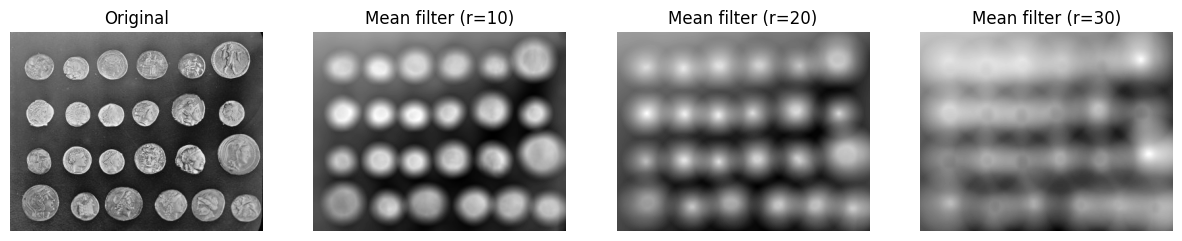

In [15]:
# solution
coins_image = data.coins()

selem_20 = morphology.disk(radius=20)
selem_30 = morphology.disk(radius=30)
selem_10 = morphology.disk(radius=10)

smooth_20 = filters.rank.mean(coins_image, selem_20)
smooth_30 = filters.rank.mean(coins_image, selem_30)
smooth_10 = filters.rank.mean(coins_image, selem_10)


# ---------- plotting ----------

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(coins_image, cmap='gray')
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(smooth_10, cmap='gray')
ax[1].set_title("Mean filter (r=10)")
ax[1].axis('off')

ax[2].imshow(smooth_20, cmap='gray')
ax[2].set_title("Mean filter (r=20)")
ax[2].axis('off')

ax[3].imshow(smooth_30, cmap='gray')
ax[3].set_title("Mean filter (r=30)")
ax[3].axis('off')

plt.show()


*   Use different selem / footprint (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

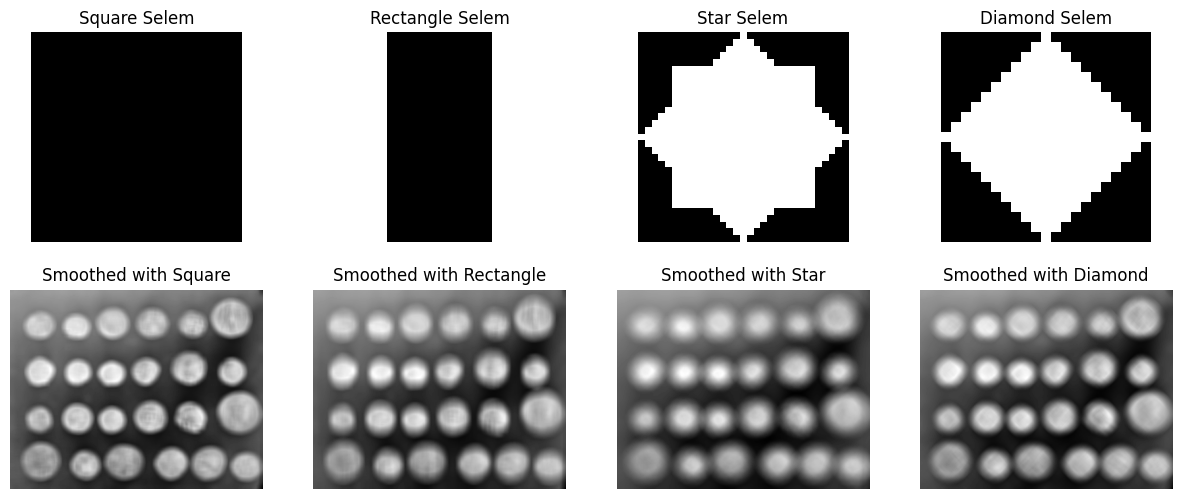

In [16]:
# solution

selems = {
    "Square"    : morphology.square(10),
    "Rectangle" : morphology.rectangle(20, 10),
    "Star"      : morphology.star(10),
    "Diamond"   : morphology.diamond(10)
}


# ---------- plotting ----------

fig, axes = plt.subplots(2, len(selems), figsize=(15, 6)) # n=4
ax = axes.ravel()

for i, (name, selem) in enumerate(selems.items()):

    # struct elem
    ax[i].imshow(selem, cmap='gray')
    ax[i].set_title(f"{name} Selem")
    ax[i].axis('off')

    # result of application
    smooth = filters.rank.mean(coins_image, selem)
    ax[i + len(selems)].imshow(smooth, cmap='gray')
    ax[i + len(selems)].set_title(f"Smoothed with {name}")
    ax[i + len(selems)].axis('off')

plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

A bigger radius results in a smoother, more blended image, with less detail, as more pixels are taken into account with the mean.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

The square selum smooths evenly, while the rectangular selum smooths more along its longest dimension (resulting in the coins appearing as ovals). Both the diamond and star selems are very similar, yet the star selem produces a much smoother result, given it takes into account more directions. Overall, the best choice for selem shape seems to be what resembles the most the object we want to segment.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

- **Question 1:** A mean filter averages pixels uniformly, while a gaussian filter gives more weight to center pixels, and such weight decays following a normal distribution.

- **Question 2:**
  - Mean filter: Used for simple noise reduction and smoothing, when uniform blur is sufficient.
  - Gaussian filter: Preferred for reducing Gaussian noise, as it preserves edges better with a more natural, localized blur.


---

## **End of P2: Image operators and filters**

This notebook is part of **Deliverable 1**

Deadline for Deliverable 1 (P2 and P3) submission in CampusVirtual is: **Monday, the 14th of October, 2024**
